### Import Libraries

In [33]:
import sys
sys.path.insert(1, '../scripts')
import extended_model
import analysis_helper
import importlib
import glob
import json
importlib.reload(extended_model)
importlib.reload(analysis_helper)

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

import numpy as np
import bisect
import itertools
from functools import reduce
from operator import mul
from scipy.stats import norm
import random
from math import comb

import multiprocessing as mp

from tqdm import tqdm

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 14

### Permutation of stable beliefs

In [4]:
types_of_stable = extended_model.permute_stable_networks(n_nodes=3)
types_of_stable_naming = {n:s for n,s in zip([",".join([str(i) for i in s]) for s in types_of_stable], types_of_stable)}

colors = ["#ef476f","#ffd166","#118ab2","#073b4c"]
types_of_stable_coloring = {k:colors[i] for i,k in enumerate(types_of_stable_naming.keys())}

### Initialize a social graph and embed belief networks

In [28]:
N = 300
p = .2
seed = 89
n_nodes = 3

# Initialize the social network
G = nx.gnp_random_graph(n=N, p=p, seed=89)

# Embed the belief networks
#belief_network_dict = {i:{'belief_network': extended_model.complete_belief_network(n_nodes=n_nodes, edge_values="default")} for i in range(N)}

belief_network_dict = {}

for i in range(N):
    g = nx.complete_graph(3)
    nx.set_edge_attributes(g, {e:{'belief':w} for e,w in zip(g.edges(), types_of_stable[np.random.randint(4)])})

    belief_network_dict[i] = {}
    belief_network_dict[i]['belief_network'] = g

nx.set_node_attributes(G, belief_network_dict)

In [29]:
types_of_stable = extended_model.permute_stable_networks(n_nodes=3)
types_of_stable_naming, types_of_stable_coloring = analysis_helper.node_coloring_prep(types_of_stable, colors = ["#ef476f","#ffd166","#118ab2","#073b4c"])

analysis_helper.node_coloring_on_social_network(G, types_of_stable_naming, types_of_stable_coloring)

In [31]:
np.unique([G.nodes[n]['color'] for n in G.nodes()])

array(['#073b4c', '#118ab2', '#ef476f', '#ffd166'], dtype='<U7')

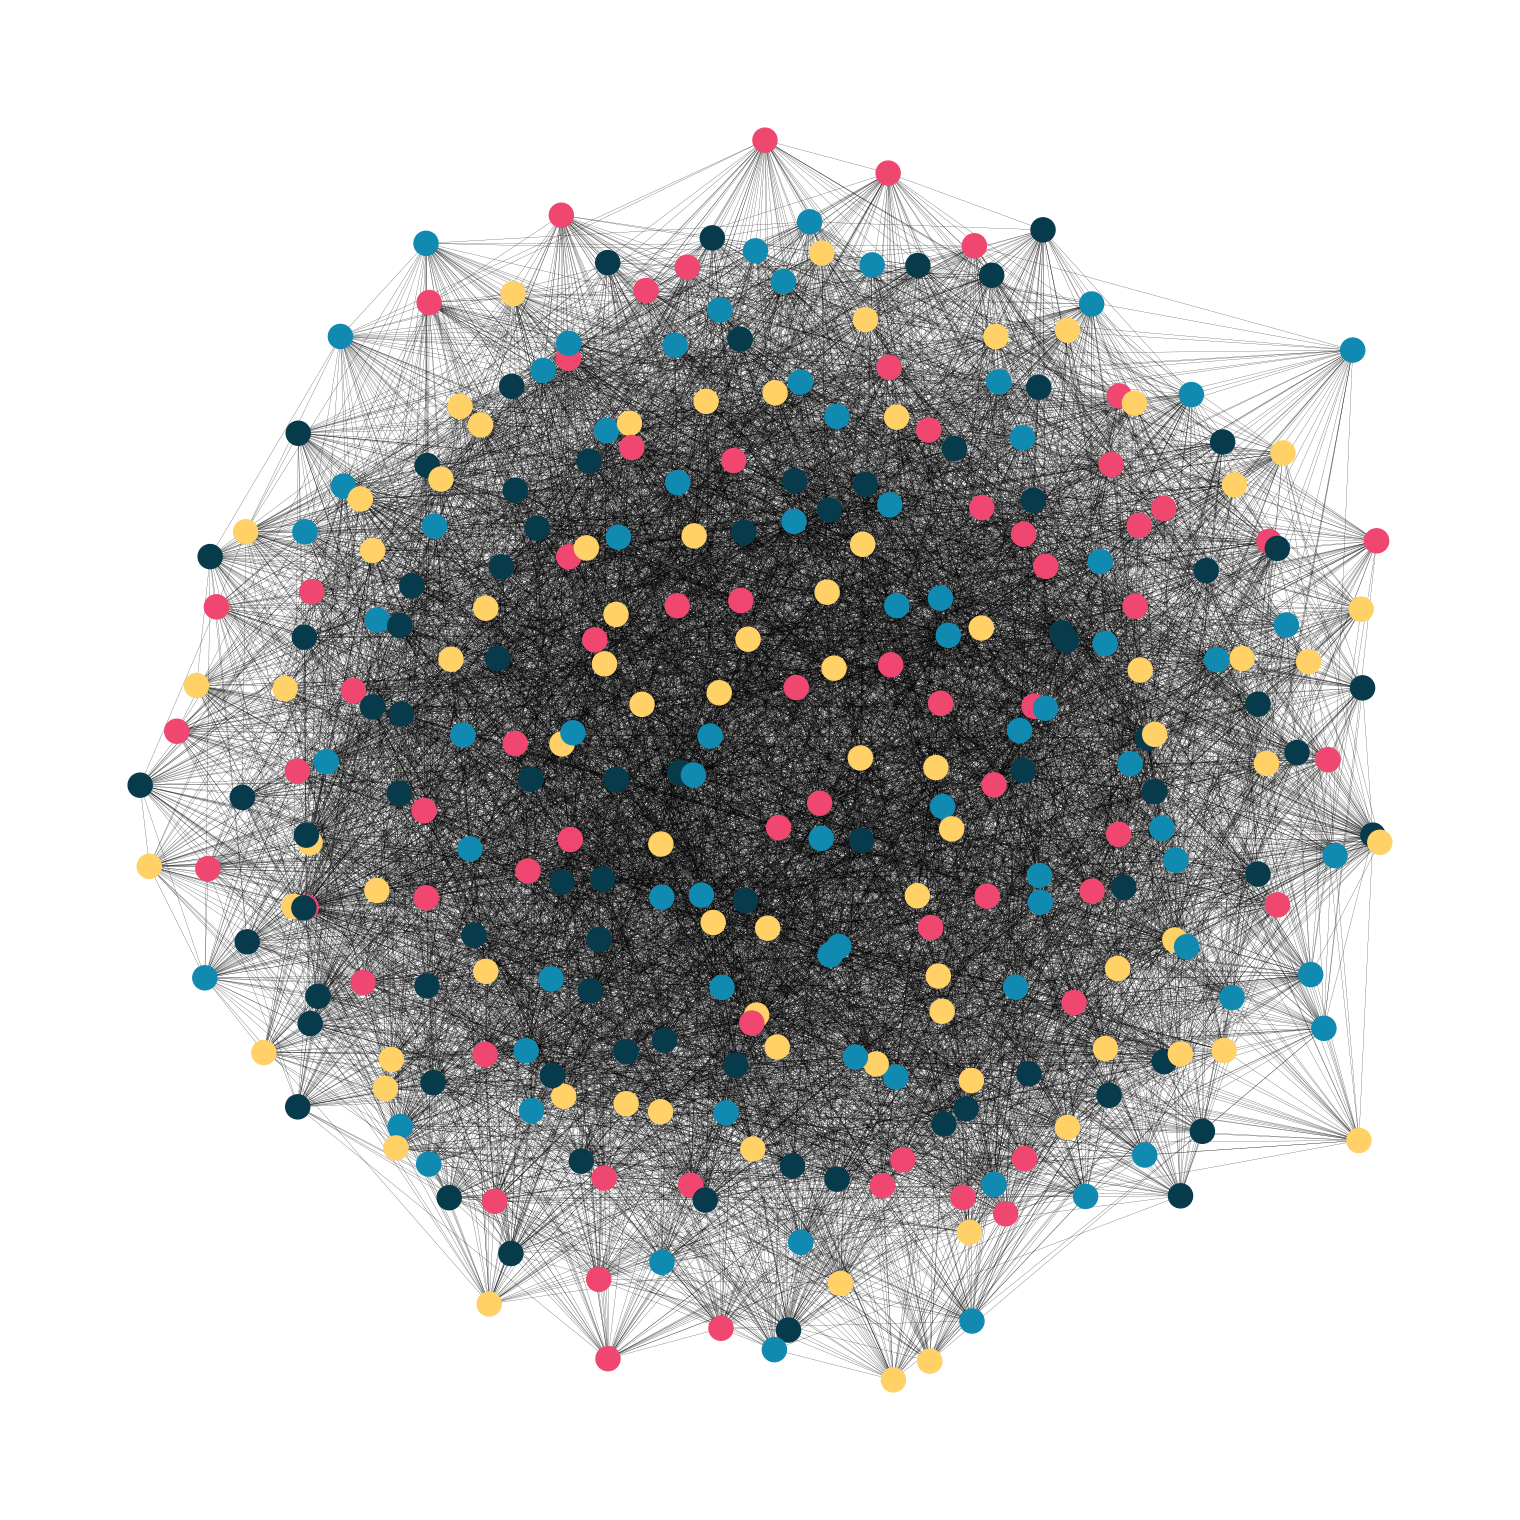

In [32]:
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G=G, seed=89)
nx.draw(G, pos, width=.15, node_color = [G.nodes[n]['color'] for n in G.nodes()], )